# 01 - Introducción a Aprendizaje Supervisado y No supervisado

por Mónica Tatiana Gutierrez Ballen

version 1.0, Agosto 2021

This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [Rick Muller](http://www.cs.sandia.gov/~rmuller/), Sandia National Laboratories

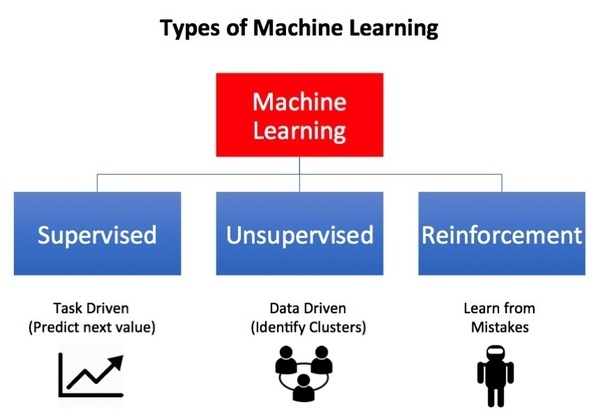

En el nivel más fundamental, la minería de datos (o aprendizaje automático) puede clasificarse en dos tipos principales: aprendizaje supervisado y aprendizaje no supervisado.

El **aprendizaje supervisado** implica modelar de algún modo la relación entre las características medidas de los datos y alguna etiqueta asociada a los mismos; una vez determinado este modelo, puede utilizarse para aplicar etiquetas a datos nuevos y desconocidos. Esto se subdivide en tareas de clasificación y tareas de regresión: en la clasificación, las etiquetas son categorías *discretas*, mientras que en la regresión, las etiquetas son cantidades *continuas*. En la siguiente sección veremos ejemplos de ambos tipos de aprendizaje supervisado.

El **aprendizaje no supervisado** implica modelar las características de un conjunto de datos sin referencia a ninguna etiqueta, y a menudo se describe como "dejar que el conjunto de datos hable por sí mismo". Estos modelos incluyen tareas como la agrupación y la reducción de la dimensionalidad. Los algoritmos de agrupación identifican grupos distintos de datos, mientras que los de reducción de la dimensionalidad buscan representaciones más sucintas de los datos. En la siguiente sección veremos ejemplos de ambos tipos de aprendizaje no supervisado.

Además, existen los llamados métodos de **aprendizaje semisupervisado**, que se sitúan entre el aprendizaje supervisado y el no supervisado. Los métodos de aprendizaje semisupervisado suelen ser útiles cuando sólo se dispone de etiquetas incompletas.

El **aprendizaje por refuerzo** es el entrenamiento de modelos de aprendizaje automático para tomar una secuencia de decisiones. El agente aprende a alcanzar un objetivo en un entorno incierto y potencialmente complejo. En el aprendizaje por refuerzo, una inteligencia artificial se enfrenta a una situación similar a un juego. El ordenador emplea el método de ensayo y error para encontrar una solución al problema. Para conseguir que la máquina haga lo que el programador quiere, la inteligencia artificial recibe recompensas o penalizaciones por las acciones que realiza. Su objetivo es maximizar la recompensa total.

## Aprendizaje supervisado

La idea es cuando se entrena al algoritmo otorgándole las preguntas, denominadas *características*, y las respuestas, denominadas *etiquetas*. Esto se hace con la finalidad de que el algoritmo las combine y pueda hacer predicciones.



## Regresión

A continuación veremos una tarea de regresión simple en la que las etiquetas son cantidades continuas.
Consideremos los datos mostrados en la siguiente figura, que consisten en un conjunto de puntos aleatorios:

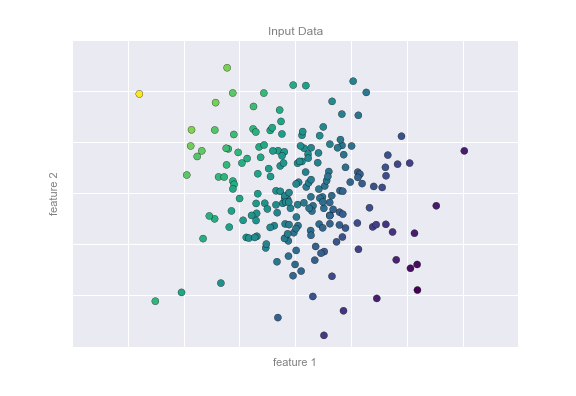

Aquí tenemos datos bidimensionales: es decir, hay dos características que describen cada punto de datos. El color de cada punto representa la etiqueta continua para ese punto.

Hay varios modelos de regresión posibles que podríamos utilizar para este tipo de datos, pero aquí utilizaremos una regresión lineal simple para predecir los puntos. Este modelo de regresión lineal simple supone que si tratamos la etiqueta como una tercera dimensión espacial, podemos ajustar un plano a los datos. Se trata de una generalización de alto nivel del conocido problema de ajustar una línea a datos con dos coordenadas.

Podemos visualizar esta configuración como se muestra en la siguiente figura:

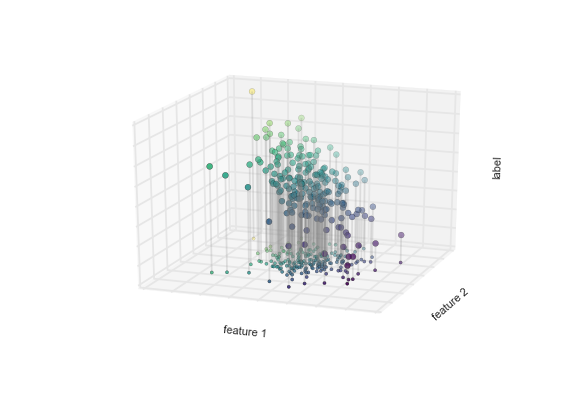

Obsérvese que el plano de la característica 1-característica 2 es el mismo que en el gráfico bidimensional de antes; sin embargo, en este caso hemos representado las etiquetas tanto por el color como por la posición del eje tridimensional. Desde este punto de vista, parece razonable que el ajuste de un plano a través de estos datos tridimensionales nos permita predecir la etiqueta esperada para cualquier conjunto de parámetros de entrada. Volviendo a la proyección bidimensional, al ajustar dicho plano obtenemos el resultado que se muestra en la siguiente figura:

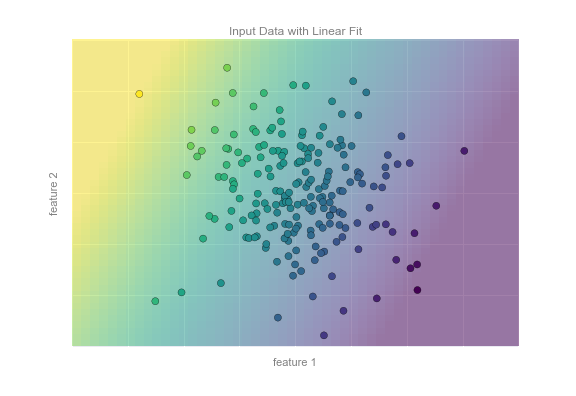

Este plano de ajuste nos da lo que necesitamos para predecir las etiquetas de los nuevos puntos. Visualmente, encontramos los resultados que se muestran en la siguiente figura:

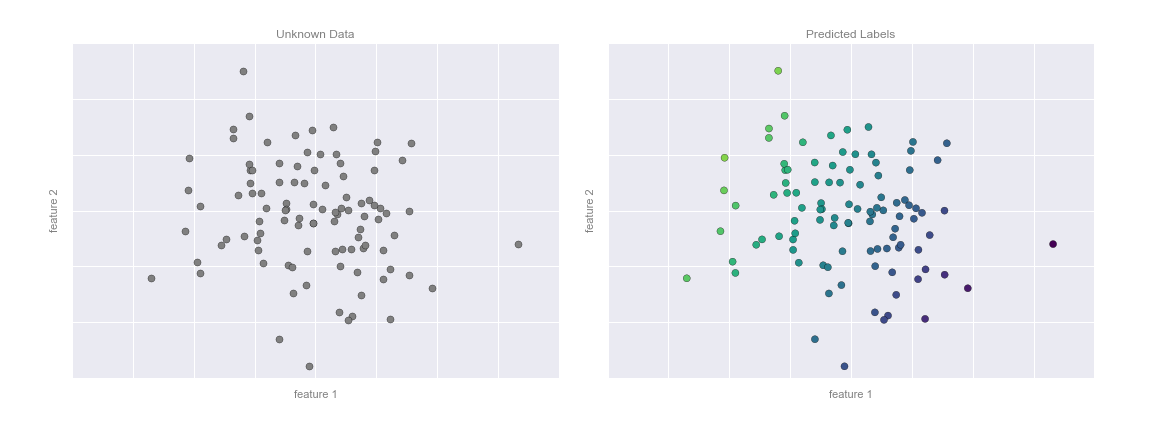

Esto puede parecer bastante trivial en un número bajo de dimensiones. Pero el poder de estos métodos es que pueden ser aplicados y evaluados directamente en el caso de datos con muchas, muchas características

Por ejemplo, esto es similar a la tarea de calcular la distancia a las galaxias observadas a través de un telescopio; en este caso, podríamos utilizar las siguientes características y etiquetas

* característica 1, característica 2, etc. $\to$ brillo de cada galaxia en una de varias longitudes de onda o colores
* etiqueta $\to$ distancia o desplazamiento al rojo de la galaxia

Las distancias de un pequeño número de estas galaxias podrían determinarse mediante un conjunto independiente de observaciones. Las distancias a las galaxias restantes podrían entonces estimarse utilizando un modelo de regresión adecuado, sin necesidad de emplear la observación más cara en todo el conjunto. En los círculos astronómicos, esto se conoce como el problema del "corrimiento al rojo fotométrico".

### Apliquemoslo en Python...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

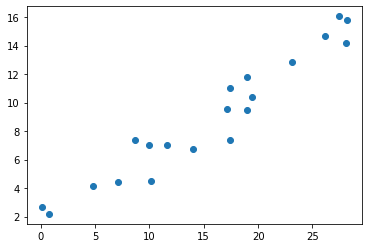

In [2]:
a = 0.5
b = 1.0

# x from 0 to 10
x = 30 * np.random.random(20)

# y = a*x + b with noise
y = a * x + b + np.random.normal(size=x.shape)

plt.scatter(x, y)

In [3]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x[:, None], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
# underscore at the end indicates a fit parameter
print(clf.coef_)
print(clf.intercept_)

[0.47735361]
1.582109952238648


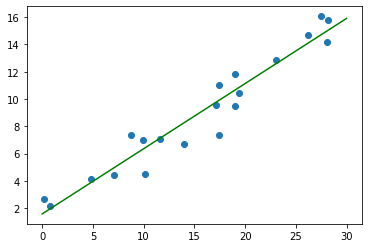

In [5]:
x_new = np.linspace(0, 30, 100)
y_new = clf.predict(x_new[:, None])
plt.scatter(x, y)
plt.plot(x_new, y_new, 'g-')

Este es un ejemplo de ajuste de un modelo a los datos, de forma que el modelo pueda hacer *generalizaciones* sobre nuevos datos. El modelo se ha aprendido a partir de los datos de entrenamiento, y puede utilizarse para predecir el resultado de los datos de prueba: en este caso, se nos podría dar un valor x, y el modelo nos permitiría predecir el valor y.

### Clasificación
Ahora veremos una tarea de clasificación sencilla, en la que se da un conjunto de puntos etiquetados y se desea utilizarlos para clasificar algunos puntos no etiquetados.

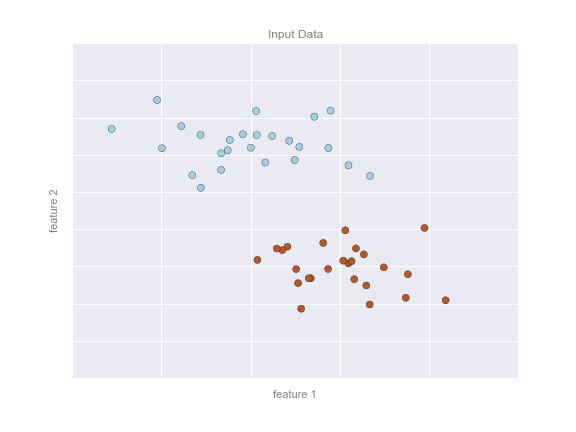

Aquí tenemos datos bidimensionales: es decir, tenemos dos características para cada punto, representadas por las posiciones (x,y) de los puntos en el plano. Además, tenemos una de las dos etiquetas de clase para cada punto, aquí representadas por los colores de los puntos. A partir de estas características y etiquetas, queremos crear un modelo que nos permita decidir si un nuevo punto debe ser etiquetado como "azul" o "rojo".

Hay varios modelos posibles para esta tarea de clasificación, pero aquí utilizaremos uno muy sencillo. Supondremos que los dos grupos pueden separarse trazando una línea recta a través del plano entre ellos, de manera que los puntos a cada lado de la línea caen en el mismo grupo. Aquí el modelo es una versión cuantitativa de la afirmación "una línea recta separa las clases", mientras que los parámetros del modelo son los números particulares que describen la ubicación y la orientación de esa línea para nuestros datos. Los valores óptimos de estos parámetros del modelo se aprenden a partir de los datos (esto es el "aprendizaje" en el aprendizaje automático), lo que suele llamarse entrenamiento del modelo.

La siguiente figura muestra una representación visual del aspecto del modelo entrenado para estos datos:

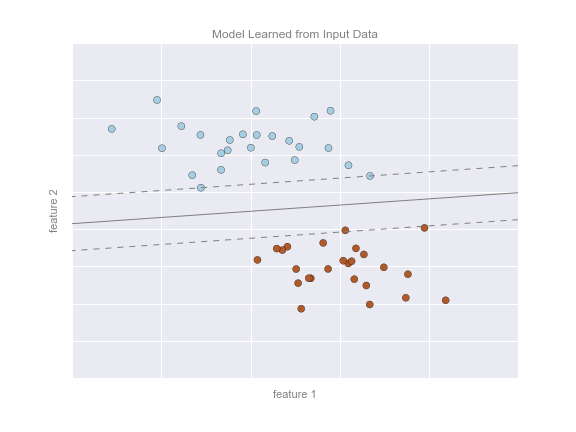



Ahora que este modelo ha sido entrenado, puede generalizarse a nuevos datos no etiquetados. En otras palabras, podemos tomar un nuevo conjunto de datos, dibujar esta línea del modelo a través de ellos y asignar etiquetas a los nuevos puntos basándonos en este modelo. Esta etapa suele denominarse predicción.

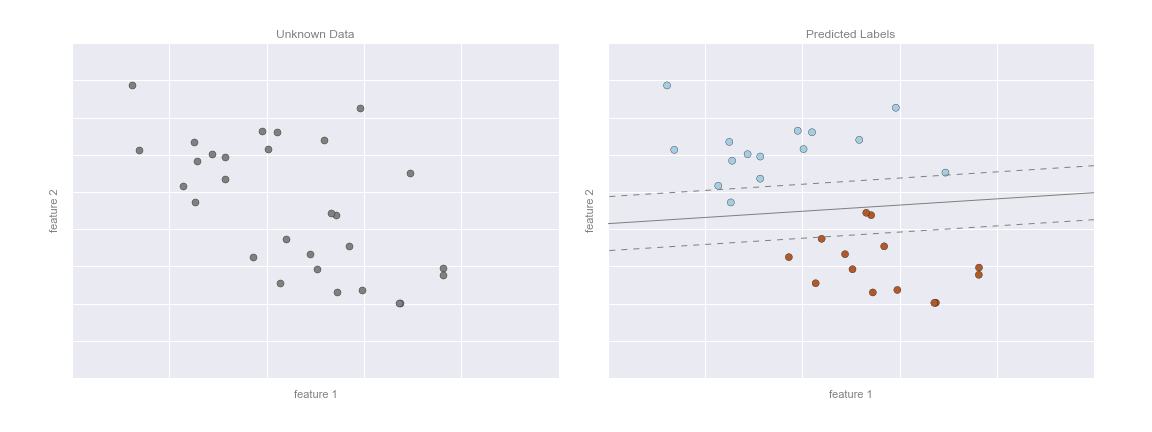

### Apliquemoslo en Python...

In [6]:
# Import libraries
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();
cmap = mpl.colors.ListedColormap(sns.color_palette("hls", 3))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


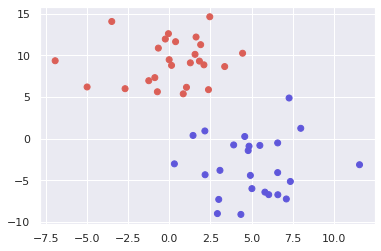

In [7]:
# Create a random set of examples
from sklearn.datasets.samples_generator import make_blobs
X, Y = make_blobs(n_samples=50, centers=2,random_state=23, cluster_std=2.90)

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap)
plt.show()

In [8]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=300, tol= 0.001, fit_intercept=True)
clf.fit(X, Y)

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=300, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .05), np.arange(y_min, y_max, .05))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

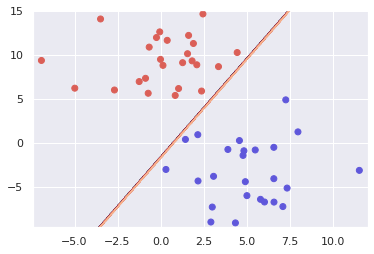

In [10]:
plt.contour(xx, yy, Z)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap)
plt.show()

Una vez más, puede parecer una tarea trivial, pero es una versión simple de un concepto muy importante.
Al trazar esta línea de separación, hemos aprendido un modelo que puede **generalizar** a nuevos datos nuevos: si se coloca otro punto en el plano que no está etiquetado, este algoritmo podría ahora **predecir** si es un punto azul o rojo.

## Representación de datos en Scikit-learn

La minería de datos consiste en crear modelos a partir de los datos: por esa razón, empezaremos por discutir cómo los datos pueden ser representados con el fin de ser entendidos por la computadora.  A lo largo de esto, nos basaremos en nuestros ejemplos de matplotlib de la sección anterior y mostraremos algunos ejemplos de cómo visualizar los datos.

La mayoría de los algoritmos de aprendizaje automático implementados en scikit-learn esperan que los datos sean almacenados en un **matriz bidimensional**.  Las matrices pueden ser matrices ``numpy``, o en algunos casos matrices ``scipy.sparse``.  Se espera que el tamaño de la matriz sea `[n_muestras, n_características]`.

- N_muestras: El número de muestras: cada muestra es un elemento a procesar (por ejemplo, a clasificar).
Una muestra puede ser un documento, una imagen, un sonido, un vídeo, un objeto astronómico,   una fila de una base de datos o un archivo CSV, o cualquier cosa que se pueda describir con un conjunto fijo de rasgos cuantitativos.

- Características: El número de características o rasgos distintivos que pueden utilizarse para describir cada elemento de forma cuantitativa.  Las características son generalmente de valor real, pero pueden ser booleanas o de valor discreto en algunos casos.

El número de rasgos debe fijarse de antemano. Sin embargo, puede ser muy dimensional (por ejemplo, millones de características) y la mayoría de ellas son ceros para una muestra determinada. Este es un caso de que las matrices `scipy.sparse` pueden ser útiles, ya que son mucho más eficientes en cuanto a memoria que las matrices numpy.

## Un ejemplo sencillo: el conjunto de datos Iris

Como ejemplo de un conjunto de datos simple, vamos a echar un vistazo a los datos del iris almacenados por scikit-learn. Los datos consisten en mediciones de tres especies diferentes de iris. Hay tres especies de iris en el conjunto de datos, que podemos imaginar aquí:

In [11]:
from IPython.core.display import Image, display
imp_path = 'https://raw.githubusercontent.com/jakevdp/sklearn_pycon2015/master/notebooks/images/'
display(Image(url=imp_path+'iris_setosa.jpg'))
print("Iris Setosa\n")

display(Image(url=imp_path+'iris_versicolor.jpg'))
print("Iris Versicolor\n")

display(Image(url=imp_path+'iris_virginica.jpg'))
print("Iris Virginica")

display(Image(url='https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/6160065e1e574a20edddc47116a0512d20656e26/notebooks/iris_with_length.png'))
print('Iris versicolor and the petal and sepal width and length')
print('From, Python Data Analytics, Apress, 2015.')

Iris Setosa



Iris Versicolor



Iris Virginica


Iris versicolor and the petal and sepal width and length
From, Python Data Analytics, Apress, 2015.


### Pregunta rápida:

**Si queremos diseñar un algoritmo para reconocer especies de iris, ¿cuáles podrían ser los datos?**

Recuerda: necesitamos un array 2D de tamaño `[n_muestras x n_características]`.

- ¿A qué se refieren las "muestras"?

- ¿A qué podrían referirse las "características"?

Recuerda que debe haber un número **fijo** de características para cada muestra, y el número de características número ``i`` debe ser un tipo de cantidad similar para cada muestra.

### Cargar los datos del iris con Scikit-Learn

Scikit-learn tiene un conjunto de datos muy sencillo sobre estas especies de iris.  Los datos consisten en lo siguiente:

- Características en el conjunto de datos de Iris:

  1. longitud del sépalo en cm
  2. anchura del sépalo en cm
  3. Longitud de los pétalos en cm
  4. anchura de los pétalos en cm

- Clases objetivo a predecir:

  1. Iris Setosa
  2. Iris Versicolor
  3. Iris Virginica
  
``scikit-learn`` incorpora una copia del archivo CSV de iris junto con una función de ayuda para cargarlo en arrays numpy:

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [13]:
n_samples, n_features = iris.data.shape
print((n_samples, n_features))
print(iris.data[0])

(150, 4)
[5.1 3.5 1.4 0.2]


In [14]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [15]:
print(iris.target)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


Estos datos son cuatridimensionales, pero podemos visualizar dos de las dimensiones a la vez utilizando un simple gráfico de dispersión:

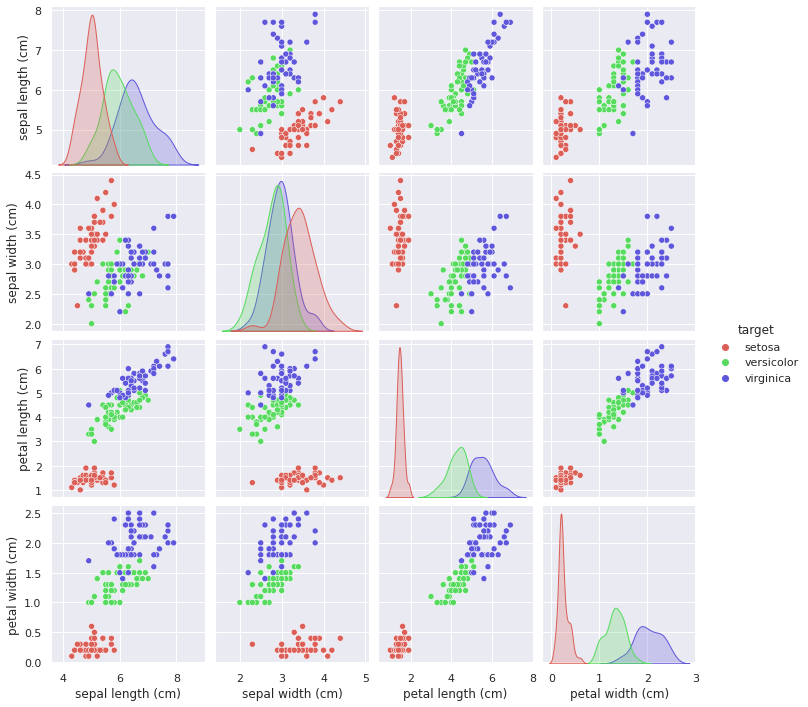

In [16]:
import pandas as pd  # Pandas is a topic of next session
data_temp = pd.DataFrame(iris.data, columns=iris.feature_names)
data_temp['target'] = iris.target
data_temp['target'] = data_temp['target'].astype('category')
data_temp['target'].cat.categories = iris.target_names
sns.pairplot(data_temp, hue='target', palette=sns.color_palette("hls", 3))

## Aprendizaje no supervisado

### Reducción de la dimensionalidad: Inferir la estructura de los datos no etiquetados
La reducción de la dimensionalidad es un ejemplo de algoritmo no supervisado, en el que las etiquetas u otra información se infieren a partir de la estructura del propio conjunto de datos.

La reducción de la dimensionalidad es un poco más abstracta que los ejemplos que hemos visto antes, pero, en general, trata de extraer alguna representación de baja dimensión de los datos que, de alguna manera, conserve las cualidades relevantes del conjunto de datos completo. Diferentes rutinas de reducción de la dimensionalidad miden estas cualidades relevantes de diferentes maneras, como veremos en In-Depth: El aprendizaje múltiple.

Como ejemplo de esto, consideremos los datos mostrados en la siguiente figura:


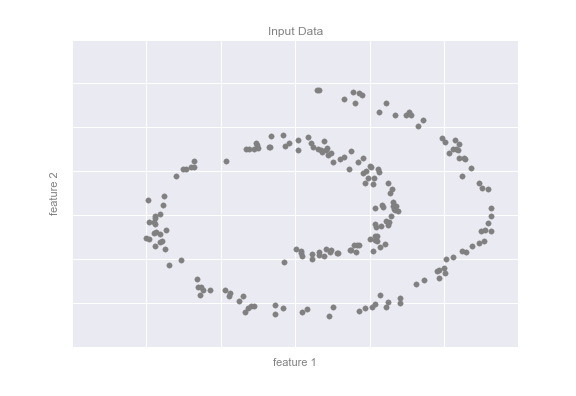

Visualmente, está claro que hay cierta estructura en estos datos: están dibujados a partir de una línea unidimensional que está dispuesta en espiral dentro de este espacio bidimensional. En cierto sentido, se podría decir que estos datos son "intrínsecamente" unidimensionales, aunque estos datos unidimensionales están incrustados en un espacio de mayor dimensión. Un modelo de reducción de la dimensionalidad adecuado en este caso sería sensible a esta estructura no lineal incrustada, y sería capaz de extraer esta representación de menor dimensionalidad.

La siguiente figura muestra una visualización de los resultados del algoritmo Isomap, un algoritmo de aprendizaje de colectores que hace exactamente esto:

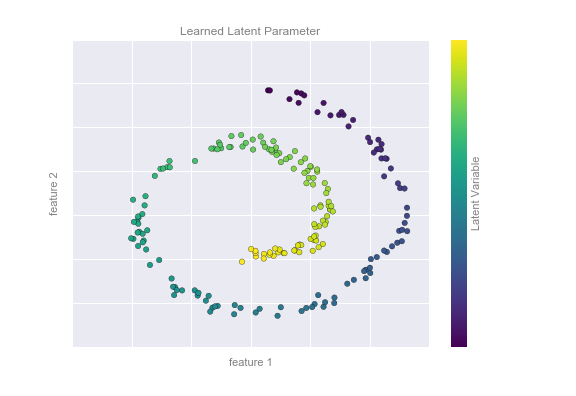

Obsérvese que los colores (que representan la variable latente unidimensional extraída) cambian uniformemente a lo largo de la espiral, lo que indica que el algoritmo detectó efectivamente la estructura que vimos a ojo. Al igual que en los ejemplos anteriores, el poder de los algoritmos de reducción de la dimensionalidad se hace más evidente en los casos de mayor dimensión. Por ejemplo, podríamos querer visualizar relaciones importantes dentro de un conjunto de datos que tiene 100 o 1.000 características. Visualizar datos de 1.000 dimensiones es un reto, y una forma de hacerlo más manejable es utilizar una técnica de reducción de la dimensionalidad para reducir los datos a dos o tres dimensiones.

### Ahora en Python...

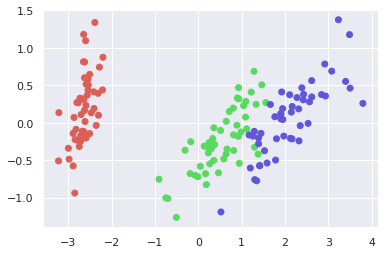

In [17]:
X, y = iris.data, iris.target
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
X_reduced = pca.transform(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=cmap)

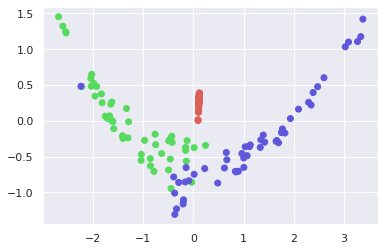

In [18]:
X, y = iris.data, iris.target
from sklearn.manifold import Isomap
pca = Isomap(n_components=3)
pca.fit(X)
X_reduced = pca.transform(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=cmap)

In [19]:
X_reduced.shape

(150, 3)

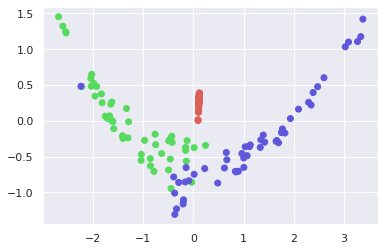

In [20]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=cmap)

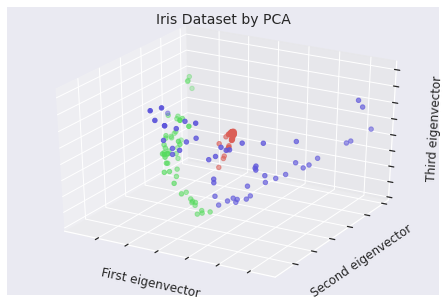

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('Iris Dataset by PCA', size=14)
ax.scatter(X_reduced[:,0],X_reduced[:,1],X_reduced[:,2], c=y, cmap=cmap)
ax.set_xlabel('First eigenvector')
ax.set_ylabel('Second eigenvector')
ax.set_zlabel('Third eigenvector')
ax.w_xaxis.set_ticklabels(())
ax.w_yaxis.set_ticklabels(())
ax.w_zaxis.set_ticklabels(())
plt.show()

### Clustering: Inferir etiquetas en datos no etiquetados
Las ilustraciones de clasificación y regresión que acabamos de ver son ejemplos de algoritmos de aprendizaje supervisado, en los que intentamos construir un modelo que prediga las etiquetas de los nuevos datos. El aprendizaje no supervisado implica modelos que describen los datos sin referencia a ninguna etiqueta conocida.

Un caso común de aprendizaje no supervisado es el "clustering", en el que los datos se asignan automáticamente a algún número de grupos discretos. Por ejemplo, podemos tener unos datos bidimensionales como los que se muestran en la siguiente figura:

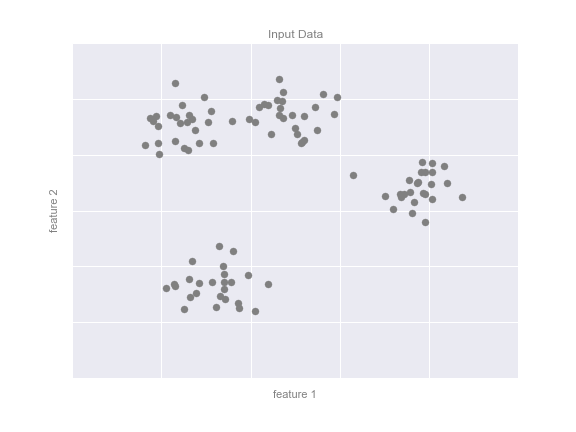

A ojo, está claro que cada uno de estos puntos forma parte de un grupo distinto. Dada esta entrada, un modelo de agrupación utilizará la estructura intrínseca de los datos para determinar qué puntos están relacionados. Utilizando el algoritmo k-means, muy rápido e intuitivo, encontramos los clusters que se muestran en la siguiente figura:

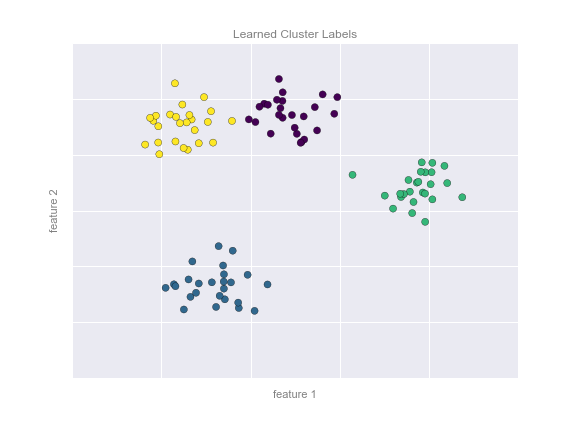

De nuevo, esto puede parecer un ejercicio trivial en dos dimensiones, pero a medida que nuestros datos se hacen más grandes y complejos, estos algoritmos de agrupación pueden emplearse para extraer información útil del conjunto de datos.

### Otra vez en Python...

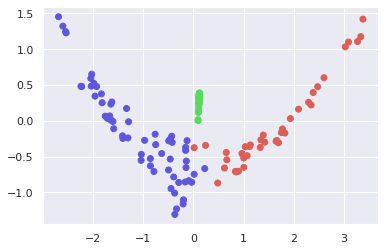

In [22]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap=cmap);

A continuación, vamos a evaluar el rendimiento de la agrupación frente a la verdad sobre el terreno

In [23]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)
print(cm)

[[ 0 50  0]
 [ 2  0 48]
 [36  0 14]]


In [24]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, iris.target_names, rotation=45)
    plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

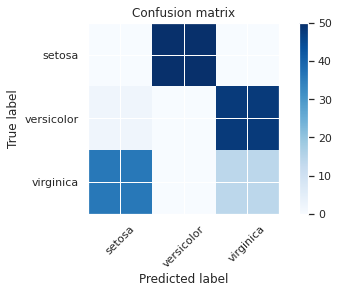

In [25]:
plt.figure()
plot_confusion_matrix(cm)

### Recapitulación: La interfaz del estimador de Scikit-learn

Scikit-learn se esfuerza por tener una interfaz uniforme en todos los métodos,
y veremos ejemplos de esto a continuación. Dado un objeto *estimador* de scikit-learn
llamado `model`, los siguientes métodos están disponibles:

- Disponible en **todos los Estimadores**
  + `model.fit()` : ajustar los datos de entrenamiento. Para aplicaciones de aprendizaje supervisado,
    acepta dos argumentos: los datos `X` y las etiquetas `y` (por ejemplo, `model.fit(X, y)`).
    Para aplicaciones de aprendizaje no supervisado, sólo acepta un único argumento,
    los datos `X` (por ejemplo, `model.fit(X)`).
- Disponible en **estimadores supervisados**.
  + `model.predict()` : dado un modelo entrenado, predice la etiqueta de un nuevo conjunto de datos.
    Este método acepta un argumento, los nuevos datos `X_new` (por ejemplo, `model.predict(X_new)`),
    y devuelve la etiqueta aprendida para cada objeto de la matriz.
  + `model.predict_proba()` : Para los problemas de clasificación, algunos estimadores también proporcionan
    este método, que devuelve la probabilidad de que una nueva observación tenga cada etiqueta categórica.
    En este caso, la etiqueta con la mayor probabilidad es devuelta por `model.predict()`.
  + `model.score()` : para los problemas de clasificación o regresión, la mayoría (¿todos?) de los estimadores implementan
    un método de puntuación.  Las puntuaciones están entre 0 y 1, y una puntuación mayor indica un mejor ajuste.
- Disponible en **estimadores no supervisados**.
  + `model.predict()` : predice las etiquetas en los algoritmos de agrupación.
  + `model.transform()` : dado un modelo no supervisado, transforma los nuevos datos en la nueva base.
    Esto también acepta un argumento `X_new`, y devuelve la nueva representación de los datos basada
    en el modelo no supervisado.
  + `model.fit_transform()` : algunos estimadores implementan este método,
    que realiza de forma más eficiente un ajuste y una transformación en los mismos datos de entrada.

# Resumen

Aquí hemos visto algunos ejemplos sencillos de algunos de los tipos básicos de enfoques de aprendizaje automático. No hace falta decir que hay una serie de detalles prácticos importantes que hemos pasado por alto, pero espero que esta sección haya sido suficiente para darle una idea básica de los tipos de problemas que pueden resolver los enfoques de aprendizaje automático.

En resumen, hemos visto lo siguiente:

* Aprendizaje supervisado: Modelos que pueden predecir etiquetas basándose en datos de entrenamiento etiquetados

  * Clasificación: Modelos que predicen etiquetas como dos o más categorías discretas
 * Regresión: Modelos que predicen etiquetas continuas

* Aprendizaje no supervisado: Modelos que identifican la estructura de los datos no etiquetados

  * Agrupación: Modelos que detectan e identifican grupos distintos en los datos
  * Reducción de la dimensionalidad: Modelos que detectan e identifican estructuras de baja dimensión en datos de alta dimensión.
  
En las siguientes secciones profundizaremos mucho más en estas categorías, y veremos algunos ejemplos más interesantes de dónde pueden ser útiles estos conceptos.

## Diagrama de flujo: Cómo elegir tu estimador

Este es un diagrama de flujo creado por el supercontribuyente de scikit-learn [Andreas Mueller](https://github.com/amueller) que ofrece un buen resumen de qué algoritmos elegir en diversas situaciones. Téngalo a mano como referencia.

In [26]:
from IPython.display import Image
Image(url="http://scikit-learn.org/dev/_static/ml_map.png",  width= 900, height= 700)

Original source on the [scikit-learn website](http://scikit-learn.org/stable/tutorial/machine_learning_map/)